# Student t-test
Analysis to find out the difference of 1 specific characteristic/variable between 2 groups by comparing the average value (mean). e.g. height between male and female.
<br>
It try to answer: Is there a significant difference between the average of 2 groups? Is it due to random chance, or did we made an error in choosing who to include in the groups (sampling error)?

# Unpaired t-test (a.k.a. independent t-test)
* comparing 2 independent or unrelated groups (e.g. height between male and female, monthly income between rural and urban dwellers)
* Null hypothesis (H0): There is no significant difference between the means of the 2 groups.
* Alternative hypothesis (H1): There is a significant difference between the two population means. The difference is unlikely caused by random chance or sampling error.
<br>
<br>
Assumptions:
1. The variable follows a normal distribution curve.
2. The observed measurement is independently sampled.
3. The variable is a ratio or interval.
4. Both group has the same standard deviation/variance.
5. The 2 groups are independent of each other.

In [13]:
# Import the necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns

In [2]:
# Import the dataset

diabetes = pd.read_csv('diabetesRCT180.csv')
diabetes.head()

,Patient_ID,Age,BMI,Status,Sex,HbA1c_0,HbA1c_6,HbA1c_12,Systolic_0,Systolic_6,Systolic_12,Aspirin_0,Aspirin_6,Aspirin_12,Education
0,131,64,31.66,0,1,8.0,7.4,8.1,140,166,136,0,0,0,1
1,140,31,25.23,1,0,11.0,10.2,12.6,131,120,110,0,1,1,1
2,159,70,27.17,0,0,8.7,9.6,11.0,110,140,140,1,1,1,0
3,173,45,36.21,1,1,15.2,6.4,6.7,130,144,158,1,1,1,2
4,98,46,41.88,1,0,9.0,7.3,6.9,136,136,124,0,1,1,1


## Clean your data

In [3]:
# Change the values in Patient_ID column to string
str(diabetes['Patient_ID'])

# Relabel categorical variables
diabetes['Status'] = diabetes['Status'].replace([0, 1], ['Single', 'Married'])
diabetes['Sex'] = diabetes['Sex'].replace([0, 1], ['Female', 'Male'])
diabetes['Education'] = diabetes['Education'].replace([0, 1, 2, 3, 4], ['Primary', 'Secondary', 'Bachelor', 'Master', 'Doctor'])

# Show the cleaned data
diabetes.head()

,Patient_ID,Age,BMI,Status,Sex,HbA1c_0,HbA1c_6,HbA1c_12,Systolic_0,Systolic_6,Systolic_12,Aspirin_0,Aspirin_6,Aspirin_12,Education
0,131,64,31.66,Single,Male,8.0,7.4,8.1,140,166,136,0,0,0,Secondary
1,140,31,25.23,Married,Female,11.0,10.2,12.6,131,120,110,0,1,1,Secondary
2,159,70,27.17,Single,Female,8.7,9.6,11.0,110,140,140,1,1,1,Primary
3,173,45,36.21,Married,Male,15.2,6.4,6.7,130,144,158,1,1,1,Bachelor
4,98,46,41.88,Married,Female,9.0,7.3,6.9,136,136,124,0,1,1,Secondary


## Perform descriptive statistics for the baseline systolic blood pressure (Systolic_0)

In [4]:
SBP0 = diabetes['Systolic_0']

stats.describe(SBP0)

DescribeResult(nobs=180, minmax=(80, 215), mean=137.69444444444446, variance=401.2413097454997, skewness=0.9322910213888529, kurtosis=2.1376522804034126)

## Interpret the result

* The sample size or the total number of objects (nobs) is 180.
* The minimum and maximum values (minmax) are 80 and 215, respectively.
* The mean systolic blood pressure is 137.69.
* The variance is 401.
* Our dataset is positively skewed with a value of 0.93.
* The kurtosis is 2.14 which means it is platykurtic.


## Plot the histogram for the baseline systolic blood pressure (Systolic_0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Baseline Systolic Blood Pressure')

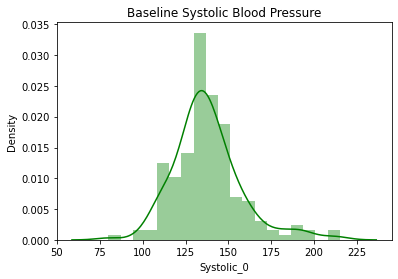

In [29]:
# Isolate the column containing the initial systolic blood pressure
SBP0 = diabetes['Systolic_0']

sns.distplot(SBP0, color='green')
plt.title('Baseline Systolic Blood Pressure')

In [6]:
# Find out the average SBP of male and female
diabetes[['Sex', 'Systolic_0']].groupby('Sex').mean()

,Systolic_0
Sex,
Female,139.712963
Male,134.666667


## Plot the comparative histogram of female and male

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Baseline SBP of Female and Male')

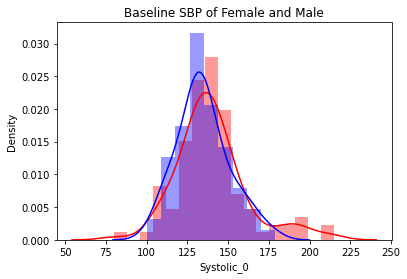

In [32]:
# Create female subset
Female = diabetes[(diabetes['Sex'] == 'Female')]
FemaleSBP = Female['Systolic_0']

# Create male subset
Male = diabetes[(diabetes['Sex'] == 'Male')]
MaleSBP = Male['Systolic_0']

plt.subplots()
sns.distplot(FemaleSBP, color='red', label='Female')
sns.distplot(MaleSBP, color='blue', label='Male')
plt.title('Baseline SBP of Female and Male')

## Perform independent t-test
* Find out if there is a significant difference between the average SBP of male and female.
* Null hypothesis (H0): There is no significant difference between the means of male and female.
* Alternative hypothesis (H1): There is a significant difference between the means of male and female.

In [7]:
# Independent t-test
stats.ttest_ind(FemaleSBP, MaleSBP)

Ttest_indResult(statistic=1.6639759372334502, pvalue=0.09787670433387921)

## Interpret the results

The p-value is 0.097, which is greater than 0.05 threshold. We cannot reject the null hypothesis. We can say that there is no significant difference between the average systolic blood pressure between male and female.


# Paired t-test (a.k.a. dependent, correlated)
* comparing same group of people (e.g. bone density between menopaused and non-menopaused women)
* comparing same item (e.g. ???
* being subjected to same conditions (e.g. effects of medicine or treatment procedure)
* Null hypothesis (H0): There is no significant difference between the means of the 2 groups.
* Alternative hypothesis (H1): There is a significant difference between the 2 group means. The difference is unlikely caused by random chance or sampling error.
<br>
<br>
Assumptions:
1. The variable follows a normal distribution curve.
2. The observed measurement is independently sampled.
3. The variable should not have any outliers.
4. The variable should be continuous (ratio or interval).
5. The 2 groups are related to each other or matched pairs.

## Compare the baseline and 12th month SBP of all female
* H0: There is no significant difference between the baseline and the 12th month systolic blood pressure of all female.
* H1: There is a significant difference between the baseline and the 12th month systolic blood pressure of all female, and this difference is unlikely due to sampling error or random chance.

In [8]:
# Create female subset (baseline and 12th month)

Female = diabetes[(diabetes['Sex'] == 'Female')]
FemaleSBP0 = Female['Systolic_0']
FemaleSBP12 = Female['Systolic_12']

## Perform descriptive statistics of the baseline and 12th month SBP for all female


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Baseline and 12th month SBP amonf female')

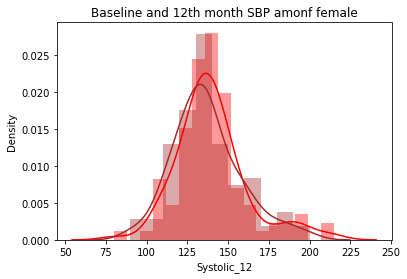

In [33]:
plt.subplots()
sns.distplot(FemaleSBP0, color='red', label='Female')
sns.distplot(FemaleSBP12, color='brown', label='Male')
plt.title('Baseline and 12th month SBP among female')

In [9]:
Female[['Systolic_0', 'Systolic_12']].describe()

,Systolic_0,Systolic_12
count,108.000000,108.000000
mean,139.712963,136.814815
std,22.032283,21.014969
min,80.000000,90.000000
25%,128.000000,124.000000
50%,137.500000,136.000000
75%,148.000000,148.000000
max,215.000000,200.000000


In [10]:
stats.describe(FemaleSBP0)

DescribeResult(nobs=108, minmax=(80, 215), mean=139.71296296296296, variance=485.4215126341295, skewness=0.9369535224340713, kurtosis=1.9241776567017617)

In [11]:
stats.describe(FemaleSBP12)

DescribeResult(nobs=108, minmax=(90, 200), mean=136.8148148148148, variance=441.62893734856345, skewness=0.6096833446672806, kurtosis=0.5884955969546759)

## Interpret the result
* The sample size consist of 108 female.
* The average SBP after 12 months (136.8) is lower than the baseline (139.7).
* The baseline standard deviation is 22 while the 12th month is 21.
* Both are positively skewed with values of 0.93 and 0.61.
* Both are platykurtic with values of 1.92 and 0.59.

## Plot the comparative histogram of the baseline and 12th month SBP among females.

## Perform a paired t-test
* Find out if there is a significant difference between the baseline and 12th month average SBP of all female.
* H0: There is no significant difference between the average baseline and 12th month SBP of all female.
* H1: There is a significant difference between the average baseline and 12th month SBP of all female

In [12]:
  stats.ttest_rel(FemaleSBP0, FemaleSBP12)

Ttest_relResult(statistic=1.1309213857176188, pvalue=0.26061665637474474)

## Interpret the results

The p-value is 0.26, which is greater than 0.05 threshold. We cannot reject the null hypothesis. We can say that there is no significant difference between the average systolic blood pressure between male and female.
